In [5]:
# To allow for proper module importing and file referencing, please reset the pwd 
# by cd to 'Senior_Thesis_Code/' on command line.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
results = pd.read_csv("res/oblique.csv")
results

,NN_dim,CART_depth,seed,min_samples_leaf,train_acc,test_acc,train_time
0,20,2,0,2,0.873529,0.807018,95.306344
1,20,2,1,2,0.870588,0.830409,94.064654
2,20,2,2,2,0.857353,0.877193,94.328841
3,20,2,3,2,0.863235,0.865497,94.870215
4,20,4,0,2,0.933824,0.853801,147.218580
...,...,...,...,...,...,...,...
355,120,28,3,4,0.979412,0.801170,191.447378
356,120,30,0,4,0.991176,0.812865,202.824943
357,120,30,1,2,0.988235,0.801170,209.280338
358,120,30,2,32,0.882353,0.766082,200.717930


In [4]:
avg_results = results.groupby(['NN_dim', "CART_depth"]).agg({"train_acc": [np.mean], "test_acc": [np.mean]})
avg_results

train_acc  test_acc
                       mean      mean
NN_dim CART_depth                    
20     2           0.866176  0.845029
       4           0.931618  0.884503
       6           0.973897  0.888889
       8           0.980882  0.894737
       10          0.977574  0.885965
...                     ...       ...
120    22          0.960294  0.795322
       24          0.960294  0.795322
       26          0.960294  0.795322
       28          0.960294  0.795322
       30          0.960294  0.795322

[90 rows x 2 columns]

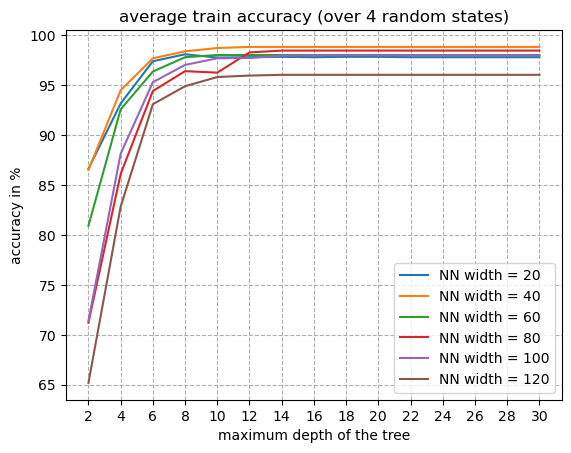

In [61]:
for dim in Dims:
    train_acc = avg_results.loc[(dim,)]['train_acc'].values.flatten()
    plt.plot(tree_depths, 100 * train_acc, label = f"NN width = {dim}", c=colors[dim])

plt.xlabel('maximum depth of the tree')
plt.ylabel('accuracy in %')
plt.title('average train accuracy (over 4 random states)')
plt.xticks(tree_depths)
plt.grid(axis="both", linestyle ="--")
plt.legend();

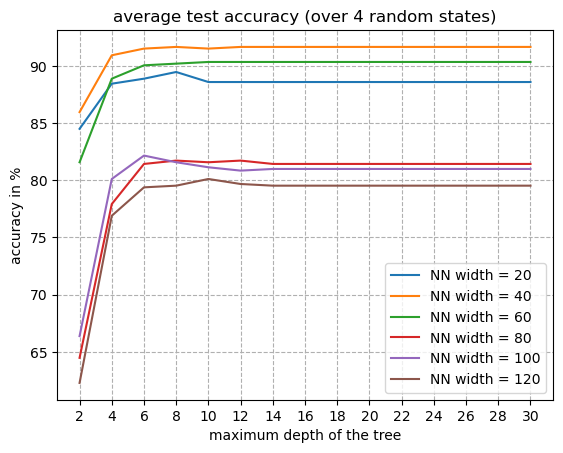

In [62]:
Dims = [20,40,60,80,100,120]
tree_depths = np.array([2 * i for i in range(1,16)])
colors = dict(zip(Dims, ['tab:blue','tab:orange','tab:green',
                         'tab:red','tab:purple','tab:brown']))

for dim in Dims:
    test_acc = avg_results.loc[(dim,)]['test_acc'].values.flatten()
    plt.plot(tree_depths, 100 * test_acc, label = f"NN width = {dim}", c=colors[dim])

plt.xlabel('maximum depth of the tree')
plt.ylabel('accuracy in %')
plt.title('average test accuracy (over 4 random states)')
plt.xticks(tree_depths)
plt.grid(axis="both", linestyle ="--")
plt.legend();